In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
import scipy.interpolate

# ASTR 310 Lecture 23 - Interpolation

### Exercise 1: 1D interpolation, different types

* Read the data from the file cat-profile.csv.  (I like np.genfromtxt or astropy Table.read, but you can do whatever works.) [1 pt]
* Select the points between x = 3.8 and 7.3; these are the "known points" around which we will be interpolating. [1 pt]
* Plot the data with nice large symbols so you can easily see the known points. [1 pt]
* Use linear interpolation to find the expected value at x = 4.12. [ans: y = 6.61]  Plot that interpolated point on your figure. [1 pt]
* Use cubic spline interpolation to find the expected value at x = 4.12. [ans: y = 7.16]  Add that to your figure as well. [1 pt]
* How'd the cubic spline point get way up there?  To find out, generate a finely sampled array of 100 x-values spanning the relevant range.  Obtain the expected (cubic spline interpolated) values at all of your sample points and plot those as on the figure in a different color. [1 pt]
* Now use linear interpolation to estimate the x value corresponding to y = 5.0 on the right side of the plot.  [ans: x = 7.17]  If you're not careful, you'll get a goofy answer since this function is not monotonic.  Select a subset of the points over which the data are monotonic.  Create a new interpolant covering just that monotonic subset, and interpolate. [2 pts]

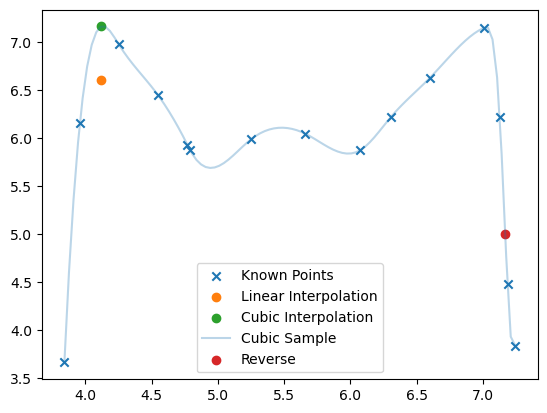

In [105]:
data = table.Table.read("cat-profile.csv")
x = np.array(data["# x"])
y = np.array(data["y"])

known = ((x > 3.8) & (x < 7.3))

interp_lin = scipy.interpolate.interp1d(x[known], y[known], kind='linear')
interp_cub = scipy.interpolate.interp1d(x[known], y[known], kind='cubic')

cubic_sample = np.linspace(x[known][0], x[known][-1], 100)

monotonic = ((x > 7) & (x < 7.3))
interp_lin_reverse = scipy.interpolate.interp1d(y[monotonic], x[monotonic], kind='linear')

plt.scatter(x[known], y[known], label="Known Points", marker='x')
plt.scatter(4.12, interp_lin(4.12), label="Linear Interpolation")
plt.scatter(4.12, interp_cub(4.12), label="Cubic Interpolation")
plt.plot(cubic_sample, interp_cub(cubic_sample), label="Cubic Sample", alpha=0.3)
plt.scatter(interp_lin_reverse(5), 5, label="Reverse")
plt.legend()

### Exercise 2: 1D interpolation error analysis

**1.)**  Write a function that does the following tasks.  Given a value $\Delta$, it should construct a uniformly sampled table of $x$ and $y$ values.  Let $x$ range from -10 to 10 with a sampling interval of $\Delta$.  Let $y = \sin(x)/x.$  (There's a function np.sinc but check the definition for a factor of $\pi.$)  Finally, use `scipy.interpolate.interp1d` to return a piecewise linear interpolant function based on this table.  [3 pts]

In [89]:
def gen_interp(delta):
    x = np.arange(-10, 10, delta)
    y = np.sin(x) / x

    return scipy.interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')

**2.)** Call your function to generate an interpolant for $\Delta = 0.5.$ Choose 50 random
x values between -10 and 10 and use your interpolant to estimate the
function values at these points. Plot the interpolated values and the
original function using different colors or symbols and make a helpful legend.

If you're finding these exercises very easy, try making a fancier version of this plot using two panels with `add_axes`, and show the residuals (interpolated value - true value) as well.  See the lecture slides for an example.

[4 pts]

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_76938/2105008982.py:3: RuntimeWarning: invalid value encountered in divide
  y = np.sin(x) / x


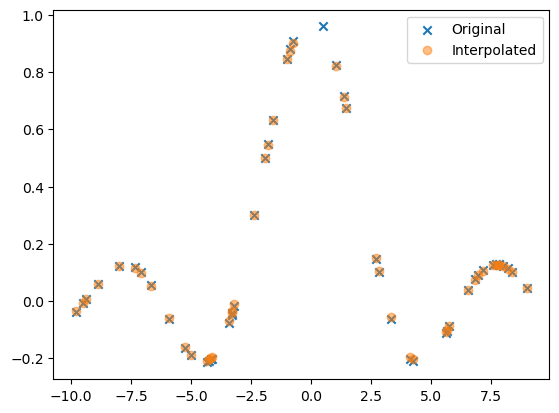

In [113]:
interp = gen_interp(0.5)
x = np.random.random_sample(50) * 20 - 10

y = interp(x)

plt.scatter(x, np.sin(x) / x, label="Original", marker='x')
plt.scatter(x, y, label="Interpolated", alpha=0.5)
plt.legend()

**3.)** Create a loop that varies $\Delta$ from $1$ to $10^{-4}$ logarithmically, decreasing by a factor of 3 with each iteration. For each iteration, 
* generate the interpolant for the corresponding value of $\Delta$,
* compute the value of the interpolant at the first random value of x (from part 2), and
* compute the error as defined by the normalized difference |interpolated value - true value|/(true value).

Plot the error in the interpolated value against $\Delta$ on a log-log plot. For a piecewise linear interpolation, you should expect the error to scale like $\Delta^2$. Plot the line $\Delta^2$ on your figure to compare to your points.

[5 pts]

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_76938/4204965864.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.loglog(np.linspace(1, 1e-4, 100), np.linspace(1, 1e-4, 100)**2, label="$\Delta^2$ Limit")
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_76938/2105008982.py:3: RuntimeWarning: invalid value encountered in divide
  y = np.sin(x) / x


(1, 0.0001)

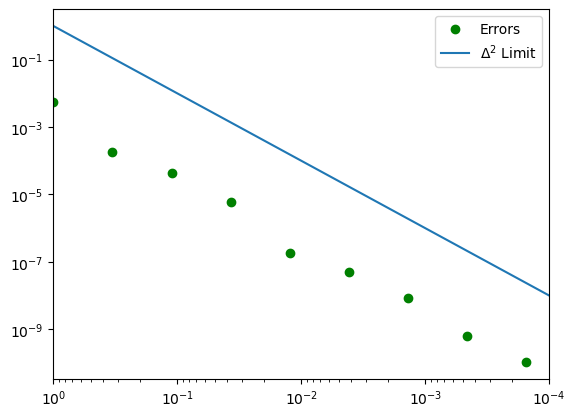

In [133]:
deltas = []
errors = []

delta = 1
while delta > 1e-4:
    interp = gen_interp(delta)
    y = interp(x[0])
    error = np.abs(y - (np.sin(x[0])/x[0])) / np.sin(x[0])/x[0]

    deltas.append(delta)
    errors.append(error)

    delta /= 3

plt.scatter(deltas, errors, label="Errors", c='green')
plt.loglog(np.linspace(1, 1e-4, 100), np.linspace(1, 1e-4, 100)**2, label="$\Delta^2$ Limit")
plt.legend()
plt.xlim(1, 1e-4)